# UMA Raw data EDA

## Import Libraries

In [33]:
# analysis
import numpy as np
import pandas as pd
import requests

# other
import warnings
import os

# visualisation libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Notebook styling
%matplotlib inline
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
warnings.filterwarnings("ignore")


## Import Data

In [3]:
task = {"username": "gometro-system-admin",
        "password": "3P6VP3ekMlPdi0IGM8VjJ6lEdZTNIuvR",
        "client_id": "gometro-uma-service",
        "grant_type": "password",
       }

endpoint = 'https://identity.gometroapp.com/auth/realms/platform/protocol/openid-connect/token'
resp = requests.post(endpoint, data=task)

if (resp.status_code < 200) and (resp.status_code >= 300):
    raise ValueError('POST /tasks/ {}'.format(resp.status_code))
    
token = resp.json()["access_token"]

headers = {
    'Authorization': f'Bearer {token}',
}
endpoint = 'https://api.gometroapp.com/uma/v1/participants/9c3e37e8-5b51-463c-8688-4452e0c39dbf/events/2021-01-12'
response = requests.get(endpoint, headers=headers)

In [23]:
def get_api_token():
    """
    This function makes a POST request to Gometro's UMA REST API and returns a valid api token
    
    ------------------------------------
    Parameters:
        participant_id (str): column name of field containing the payload of the data
        date (str): column name of field containing the payload of the data
    
    Returns: (pandas.DataFrame): Dataframe with payload data in each column
    ------------------------------------
    Example:
    
    
    
    """
    
    # get dictionary of authorisation credentials
    task = {"username": "gometro-system-admin",
            "password": "3P6VP3ekMlPdi0IGM8VjJ6lEdZTNIuvR",
            "client_id": "gometro-uma-service",
            "grant_type": "password",
           }
    
    # make api request
    endpoint = 'https://identity.gometroapp.com/auth/realms/platform/protocol/openid-connect/token'
    response = requests.post(endpoint, data=task)
    
    # catch error
    if (response.status_code < 200) and (response.status_code >= 300):
        raise ValueError('POST /tasks/ {}'.format(response.status_code))
    
    return response.json()["access_token"]
    
    

In [29]:
def get_raw_user_data(pid, date, token):
    
    """
    This function makes a GET request to Gometro's UMA REST API and returns data from
    the API.
    
    ------------------------------------
    Parameters:
        participant_id (str): column name of field containing the payload of the data
        date (str): column name of field containing the payload of the data
    
    Returns: (pandas.DataFrame): Dataframe with payload data in each column
    ------------------------------------
    Example:
    
    
    
    """
    
    # define API headers
    headers = {'Authorization': f'Bearer {token}'}
    
    # make api request    
    endpoint = f'https://api.gometroapp.com/uma/v1/participants/{pid}/events/{date}'
    response = requests.get(endpoint, headers=headers)
    
    # catch error
    if (response.status_code < 200) and (response.status_code >= 300):
        raise ValueError('GET /tasks/ {}'.format(response.status_code))
    
    # import data
    df = pd.DataFrame(response.json())
    
    # select location data
    return df[df['type'] == 'LocationChanged']
    

In [30]:
token = get_api_token()
get_raw_user_data('9c3e37e8-5b51-463c-8688-4452e0c39dbf', '2021-01-12', token)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJXOEJqLU9Yd2VUNm5jNGNmRmxTYkJKM0hCdTdESGlfeXo5WjdaZGc0c1g0In0.eyJleHAiOjE2MTI1MzA0OTgsImlhdCI6MTYxMjUzMDE5OCwianRpIjoiODlhYjI5ZGItZjM4MS00MGY3LWE5ZTQtYTYxMjYxM2UzNDZiIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5nb21ldHJvYXBwLmNvbS9hdXRoL3JlYWxtcy9wbGF0Zm9ybSIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiJiNDc0MjE4ZS0zNTM1LTQ1MTQtYjBiNy02YTI3ODIzNmFjMjMiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJnb21ldHJvLXVtYS1zZXJ2aWNlIiwic2Vzc2lvbl9zdGF0ZSI6Ijk5NmJlNTg1LWE0MWItNGVlNi04NmJmLTViNjE5YjI5Y2ZhOCIsImFjciI6IjEiLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsib2ZmbGluZV9hY2Nlc3MiLCJzeXN0ZW1fYWRtaW4iLCJ1bWFfYXV0aG9yaXphdGlvbiJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInNjb3BlIjoicHJvZmlsZSBlbWFpbCIsImVtYWlsX3ZlcmlmaWVkIjpmYWxzZSwicHJlZmVycmVkX3VzZXJuYW1lIjoiZ29tZXRyby1zeXN0ZW0tYWRtaW4ifQ.a8GdSNn25Aca9_i3qMli2OAnlP7wQp8FQLDv5IeNThCe_m2xHdMSAUXBuVz2ZNEowKn3bWDK_irn7Hz8us3Wxny8JYsWYINdKPAP39BBFs1lRpHg6Qmrd

timestamp             type  \
9     2021-01-12T03:03:35Z  LocationChanged   
16    2021-01-12T03:07:30Z  LocationChanged   
19    2021-01-12T03:09:39Z  LocationChanged   
30    2021-01-12T03:17:46Z  LocationChanged   
35    2021-01-12T03:21:04Z  LocationChanged   
...                    ...              ...   
2204  2021-01-13T01:14:34Z  LocationChanged   
2205  2021-01-13T01:14:39Z  LocationChanged   
2207  2021-01-13T01:15:21Z  LocationChanged   
2312  2021-01-13T02:37:42Z  LocationChanged   
2331  2021-01-13T02:52:35Z  LocationChanged   

                                                payload  
9     {"provider":"gps","latitude":-33.868675,"longi...  
16    {"provider":"gps","latitude":-33.8687266666666...  
19    {"provider":"gps","latitude":-33.8686466666666...  
30    {"provider":"gps","latitude":-33.8687233333333...  
35    {"provider":"gps","latitude":-33.8687250000000...  
...                                                 ...  
2204  {"provider":"gps","latitude":-33.8686,"longitu...  
2205  {"provider":"gps","latitude":-33.8686966666666...  
2207  {"provider":"gps","latitude":-33.8686816666666...  
2312  {"provider":"gps","latitude":-33.868595,"longi...  
2331  {"provider":"gps","latitude":-33.8686816666666...  

[455 rows x 3 columns]

In [8]:
def unpack_payload(df, payload_col = 'payload'):
    
    """
    This function takes a dataframe where the payload is in one column
    and creates a new column for each element in the payload
    
    ------------------------------------
    Parameters:
        df (pandas.DataFrame): DataFrame containing column with payload
        payload_col (str): column name of field containing the payload of the data
    
    Returns: (pandas.DataFrame): Dataframe with payload data in each column
    ------------------------------------
    Example:
    
    
    """
    
    # make copy of dataframe
    df = df.copy()
    
    # import literal_eval function
    from ast import literal_eval

    # make list of column headers from keys
    payload_cols = literal_eval(df['payload'].iloc[0]).keys()
    
    # add columns for each column header to dataframe
    for col in payload_cols:
        df[col] = df_waypoints['payload'].apply(lambda x: literal_eval(x)[col])
        
    # remove type and payload column
    df.drop(['type', 'payload'], axis=1, inplace=True)
    
    return df



Unpacking the payload and updating the table

In [27]:
df_waypoints = unpack_payload(df_waypoints)
print(df_waypoints.shape)
print(df_waypoints.info())
df_waypoints.head()

(455, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 9 to 2331
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  455 non-null    object 
 1   provider   455 non-null    object 
 2   latitude   455 non-null    float64
 3   longitude  455 non-null    float64
 4   accuracy   455 non-null    float64
 5   bearing    455 non-null    float64
 6   speed      455 non-null    float64
dtypes: float64(5), object(2)
memory usage: 28.4+ KB
None


timestamp provider   latitude  longitude  accuracy     bearing  \
9   2021-01-12T03:03:35Z      gps -33.868675  18.538848       2.6  319.809998   
16  2021-01-12T03:07:30Z      gps -33.868727  18.538848       2.7  174.240005   
19  2021-01-12T03:09:39Z      gps -33.868647  18.538888       3.0  210.520004   
30  2021-01-12T03:17:46Z      gps -33.868723  18.538930       1.8   23.870001   
35  2021-01-12T03:21:04Z      gps -33.868725  18.538823       2.2  250.300003   

       speed  
9   0.000000  
16  0.117357  
19  0.000000  
30  0.028824  
35  0.407145

In [25]:
def prep_data_raw(df):
    
    """
    This function takes data unpacked from GoMetro's UMA REST API using the
    unpack_payload function and returns a dataframe with the following columns
    added to the data
    
    ------------------------------------
    Parameters:
        df (pandas.DataFrame): DataFrame containing column with payload
    
    Returns: (pandas.DataFrame): Dataframe with payload data in each column
    ------------------------------------
    Example:
    
    
    """
    
    # make copy of dataframe
    df = df.copy()
    
    # convert timetamps to date time
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # add features
    df['time_change'] = df['timestamp'].diff().dt.seconds
    df['speed_change'] = df['speed'].diff()
    df['acceleration'] = df['speed_change']/df['time_change']
    df['cumm_acceleration'] = df['acceleration'].cumsum()
    
    # make timestamp index
    df = df.set_index('timestamp')
    
    return df

In [18]:
def add_label_units(label):
    """
    This function generates a label with units
    ------------------------------------
    Parameters:
        label (str): column name of field we want units for
    
    Returns:
        (str): column name of field with the units such that '<label> (<unit>)'
    ------------------------------------
    Example:
    
    """
    
    # define dictionary of units for known column names
    units_dict = {'speed': 'm/s',
                  'acceleration': 'm/$s^{2}$',
                  'cumm_acceleration': 'm/$s^{2}$',
                  'bearing': '$&deg;$',
                  'latitude': '$&deg;$',
                  'longitude': '$&deg;$',
                  'accuracy': 'm',
                  'distance': 'm'
                  }
    
    # return units for known column names
    if label in units_dict.keys():
        return f'{label} [{units_dict[label]}]'
    
    # return label for unknown colum names
    return label

In [41]:
def raw_trip_analysis_plot(df, col, participant_id, date,
                           figures_dir=os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')):
    
    # 1. set size of figure
    fig, ax = plt.subplots(figsize=(400,10))
    
    
    # 2. plot figure
    ax.plot(df_waypoints.loc[date][col], linestyle='-', color='b')

                        
    # 3. format figure
    # 3.1 set title of figure
    ax.set_title(f"{col} profile over time on {date}")
    
    # 3.2 set y_label
    ax.set_ylabel(add_label_units(col))
    
    # 3.3 set x_label
    ax.set_xlabel('time [24hrs]')
    
    # 3.4 set x-axis ticks to 1 min intervals
    xlocator = mdates.MinuteLocator(interval = 1)
    ax.xaxis.set_major_locator(xlocator)
    
    ## Format xtick labels as HH:MM
    xformatter = mdates.DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    
    # plt.xticks(rotation=90)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    # 4.a define path
    file_path = os.path.join(figures_dir, participant_id, f'{date}_{col}_vs_time')
    
    # 4.b ensure that path directory exists
    file_dir = os.path.join(figures_dir, participant_id)
    if not os.path.exists(file_dir):
        os.mkdir(file_dir)
    
    # 5 save figure
    plt.savefig(file_path)
    
    # 6 display figure
    plt.show()

In [ ]:
user_trips = [
    [24, '0ab124d9-edd9-410e-ab72-9fb8ffc7cedd', '1/18/2021'],
    [4, '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '1/13/2021'],
    [25, '0ab124d9-edd9-410e-ab72-9fb8ffc7cedd', '1/18/2021'],
    [12, '0563a400-c33a-477f-a656-2a3309d490cb', '1/14/2021'],
    [5, '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '1/13/2021']
]

In [32]:
# define base directory for all figures
work_dir = os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')

# define variables to visualise
viz_cols = ['cumm_acceleration', 'bearing', 'acceleration', 'speed']

# get token to access api
token = get_api_token()

for trip, participant, date in user_trips:
    # convert date format
    old_date = date.split("/")
    new_date = old_date[2] + "-" + old_date[0].zfill(2) + "-"+ old_date[1]

    try:
        df_api = get_raw_user_data(participant, date, token)
        df_raw = unpack_payload(df_api)
        df_raw_extra = prep_data_raw(df_waypoints)

        for col in viz_cols:
            raw_trip_analysis_plot(df_raw_extra, col, participant, date, work_dir)

    except:
        token = get_api_token()
        dataset = get_raw_user_data(participant, date, token)
        df_raw = unpack_payload(df_api)
        df_raw_extra = prep_data_raw(df_waypoints)

        for col in viz_cols:
            raw_trip_analysis_plot(df_raw_extra, col, participant, date, work_dir)


In [40]:
work_dir = os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')
pid = '9c3e37e8-5b51-463c-8688-4452e0c39dbf'
file_dir = os.path.join(work_dir, pid)
if not os.path.exists(file_dir):
    os.mkdir(file_dir)

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]),

Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]),

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]),

Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1365 ticks ([18639.084722222222, ..., 18640.031944444443]),

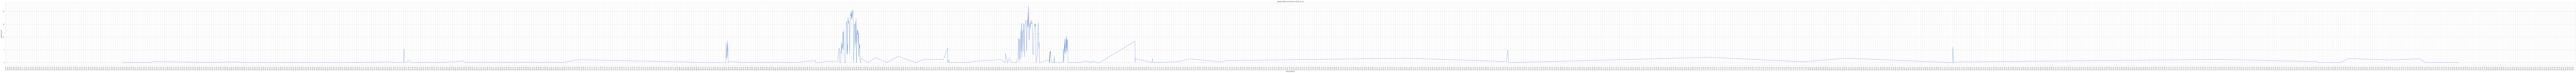

In [21]:
viz_cols = ['cumm_acceleration', 'bearing', 'acceleration', 'speed']

for col in viz_cols:
    raw_trip_analysis_plot(df_waypoints, col, '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '2021-01-12', '')

In [ ]:
raw_trip_analysis_plot(df_waypoints, 'cumm_acceleration', '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '2021-01-12', '')

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1361 ticks ([18639.0875, ..., 18640.031944444443]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to ge

In [34]:
df_waypoints = add_feat(df_waypoints)
print(df_waypoints.shape)
df_waypoints.head()

(451, 20)


latitude  longitude  accuracy provider            timestamp  lat_shift  \
9  -33.868675  18.538848       2.6      gps  1610420615000000000 -33.868727   
16 -33.868727  18.538848       2.7      gps  1610420850000000000 -33.868647   
19 -33.868647  18.538888       3.0      gps  1610420979000000000 -33.868723   
30 -33.868723  18.538930       1.8      gps  1610421466000000000 -33.868725   
35 -33.868725  18.538823       2.2      gps  1610421664000000000 -33.868783   

    long_shift    time_shift  speed  speed_shift  acceleration  \
9    18.538848  1.610421e+18    NaN          NaN           NaN   
16   18.538888  1.610421e+18    NaN          NaN           NaN   
19   18.538930  1.610421e+18    NaN          NaN           NaN   
30   18.538823  1.610422e+18    NaN          NaN           NaN   
35   18.538723  1.610422e+18    NaN          NaN           NaN   

    acceleration_shift  jerk  jerk_shift   y   x  bearing  brearing_shift  \
9                  NaN   NaN         NaN NaN NaN      NaN             NaN   
16                 NaN   NaN         NaN NaN NaN      NaN             NaN   
19                 NaN   NaN         NaN NaN NaN      NaN             NaN   
30                 NaN   NaN         NaN NaN NaN      NaN             NaN   
35                 NaN   NaN         NaN NaN NaN      NaN             NaN   

    bearing_rate  distance  
9            NaN       NaN  
16           NaN       NaN  
19           NaN       NaN  
30           NaN       NaN  
35           NaN       NaN

In [20]:
df_waypoints.iloc[:, 0] == df_waypoints.latitude

9       True
16      True
19      True
30      True
35      True
        ... 
2087    True
2089    True
2147    True
2203    True
2204    True
Name: latitude, Length: 451, dtype: bool

Data types and null values

In [29]:
df_waypoints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 9 to 2204
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   latitude            451 non-null    float64            
 1   longitude           451 non-null    float64            
 2   accuracy            451 non-null    float64            
 3   provider            451 non-null    object             
 4   timestamp           451 non-null    datetime64[ns, UTC]
 5   lat_shift           451 non-null    float64            
 6   long_shift          451 non-null    float64            
 7   time_shift          451 non-null    datetime64[ns, UTC]
 8   speed               0 non-null      float64            
 9   speed_shift         0 non-null      float64            
 10  acceleration        0 non-null      float64            
 11  acceleration_shift  0 non-null      float64            
 12  jerk                0 non-null     

## Univariate Analysis

1. Categorical variables
1. Numerical variables

### Categorical variables

1. `timestamps`
2. `provider`

Assessing `timestamps`

In [79]:
df_waypoints['timestamp'].value_counts()

2021-01-12T12:11:20Z    1
2021-01-12T09:35:37Z    1
2021-01-12T11:05:28Z    1
2021-01-12T11:25:39Z    1
2021-01-12T09:34:26Z    1
                       ..
2021-01-12T23:26:56Z    1
2021-01-12T11:00:54Z    1
2021-01-12T09:02:34Z    1
2021-01-12T11:16:09Z    1
2021-01-12T10:58:51Z    1
Name: timestamp, Length: 455, dtype: int64

In [80]:
df_waypoints['timestamp'] = pd.to_datetime(df_waypoints['timestamp'])
df_waypoints['timestamp'].head()

9    2021-01-12 03:03:35+00:00
16   2021-01-12 03:07:30+00:00
19   2021-01-12 03:09:39+00:00
30   2021-01-12 03:17:46+00:00
35   2021-01-12 03:21:04+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [81]:
# df_waypoints['time'] = df_waypoints['timestamp'].dt.time
# df_waypoints['time']

In [82]:
df_waypoints = df_waypoints.set_index('timestamp')
df_waypoints.head()

latitude  longitude  accuracy provider
timestamp                                                         
2021-01-12 03:03:35+00:00 -33.868675  18.538848       2.6      gps
2021-01-12 03:07:30+00:00 -33.868727  18.538848       2.7      gps
2021-01-12 03:09:39+00:00 -33.868647  18.538888       3.0      gps
2021-01-12 03:17:46+00:00 -33.868723  18.538930       1.8      gps
2021-01-12 03:21:04+00:00 -33.868725  18.538823       2.2      gps

Assessing `provider`

In [83]:
df_waypoints['provider'].value_counts()

gps    455
Name: provider, dtype: int64

In [84]:
df_waypoints['provider'].value_counts(normalize=True)

gps    1.0
Name: provider, dtype: float64

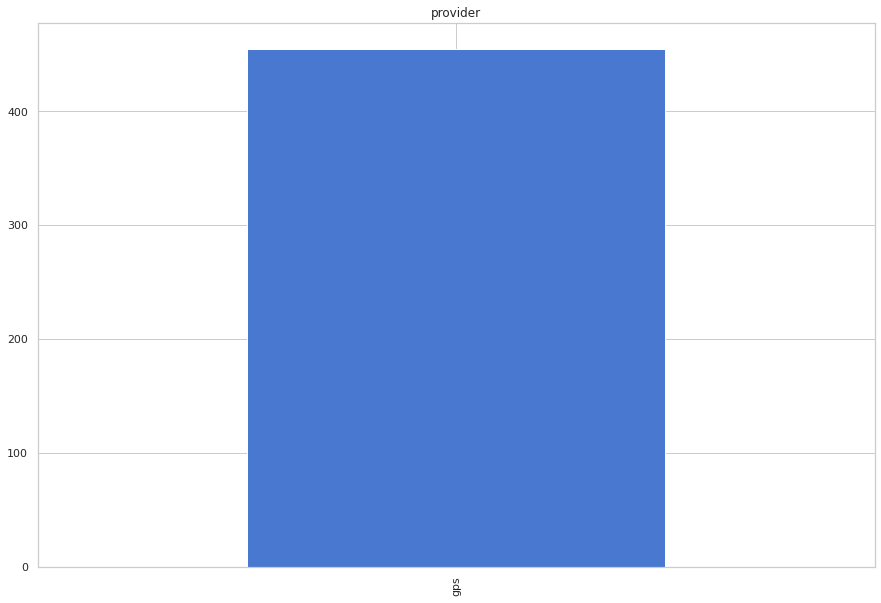

In [85]:
# column to visualise
col = 'provider'

df_waypoints[col].value_counts().plot(kind='bar')
plt.title(col)
plt.show()


### Numerical variables

1. `accuracy`
1. `bearing`
1. `speed`

In [86]:
df_waypoints.describe().drop(['latitude', 'longitude'], axis=1)

accuracy
count  455.000000
mean     2.885714
std      1.044196
min      1.000000
25%      2.300000
50%      2.700000
75%      3.100000
max      9.900000

Assessing `accuracy`

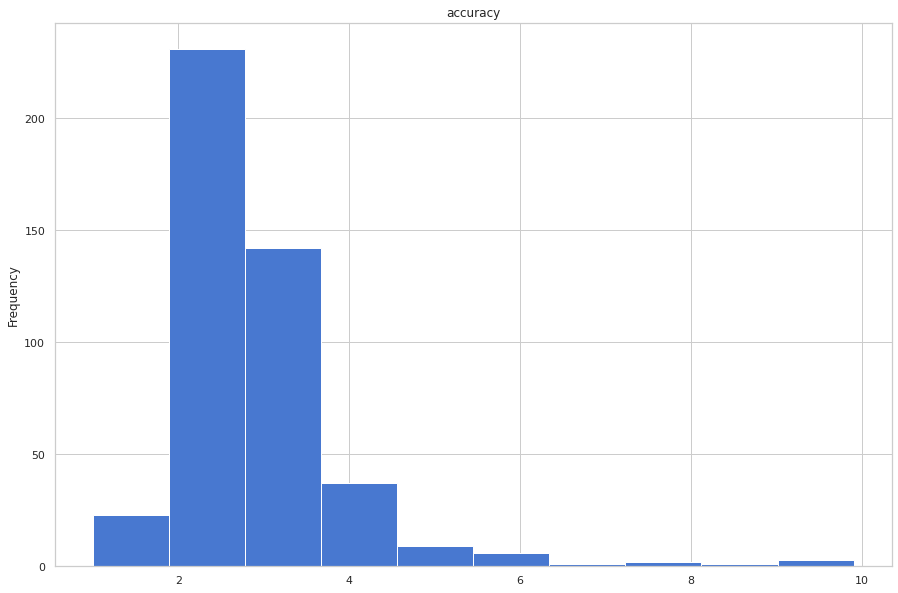

In [87]:
# column to visualise
col = 'accuracy'

df_waypoints[col].plot(kind='hist')
plt.title(col)
plt.show()

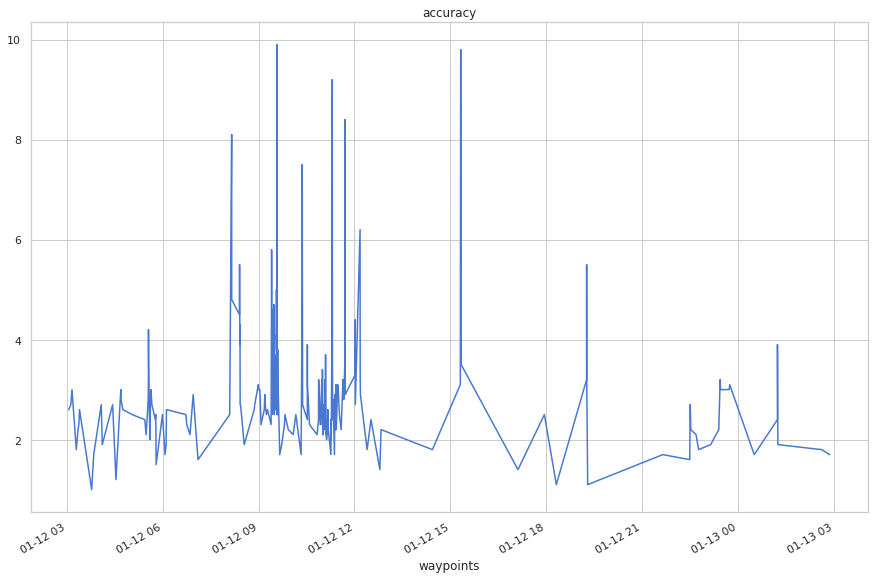

In [88]:
df_waypoints[col].plot(kind='line')
plt.title(col)
plt.xlabel('waypoints')
plt.show()

Assessing `bearing`

In [89]:
# column to visualise
col = 'bearing'

df_waypoints[col].plot(kind='hist')
plt.title(col)
plt.show()

KeyError: 'bearing'

In [ ]:
df_waypoints[col].plot(kind='line')
plt.title(col)
plt.xlabel('waypoints')
plt.show()

Assessing `speed`

In [ ]:
# column to visualise
col = 'speed'

df_waypoints[col].plot(kind='hist')
plt.title(col)
plt.show()

In [ ]:
df_waypoints[col].plot(kind='line')
plt.title(col)
plt.xlabel('waypoints')
plt.show()

In [ ]:
def add_label_units(label):
    """
    This function generates a label with units
    ------------------------------------
    Parameters:
        label (str): column name of field we want units for
    
    Returns:
        (str): column name of field with the units such that '<label> (<unit>)'
    ------------------------------------
    Example:
    
    """
    
    # define dictionary of units for known column names
    units_dict = {'speed': 'm/s',
                  'acceleration': 'm/$s^{2}$',
                  'cumm_acceleration': 'm/$s^{2}$',
                  'bearing': '$&deg;$',
                  'latitude': '$&deg;$',
                  'longitude': '$&deg;$',
                  'accuracy': 'm',
                  'distance': 'm'
                  }
    
    # return units for known column names
    if label in units_dict.keys():
        return f'{label} [{units_dict[label]}]'
    
    # return label for unknown colum names
    return label

In [36]:
os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')

'../../resources/reports/figures/raw_data_viz'

In [ ]:
def raw_trip_analysis_plot(df, col, participant_id, date,
                           figures_dir=os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')):
    
    # 1. set size of figure
    fig, ax = plt.subplots(figsize=(400,10))
    
    
    # 2. plot figure
    ax.plot(df_waypoints.loc[date][col], linestyle='-', color='b')

                        
    # 3. format figure
    # 3.1 set title of figure
    ax.set_title(f"{col} profile over time on {date}")
    
    # 3.2 set y_label
    ax.set_ylabel(add_label_units(col))
    
    # 3.3 set x_label
    ax.set_xlabel('time [24hrs]')
    
    # 3.4 set x-axis ticks to 1 min intervals
    xlocator = mdates.MinuteLocator(interval = 1)
    ax.xaxis.set_major_locator(xlocator)
    
    ## Format xtick labels as HH:MM
    xformatter = mdates.DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    
    # plt.xticks(rotation=90)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    # 4. define path
    file_path = os.path.join(figures_dir, participant_id, f'{date}_{col}_vs_time')
    
    # 5 save figure
    plt.savefig(file_path)
    
    # 6 display figure
    plt.show()

In [38]:
figures_dir = os.path.join('..','..', 'resources', 'reports','figures','raw_data_viz')
participant_id = 'test'
date = '2020-01-12'
col = 'acceleration'
os.path.join(figures_dir, participant_id, f'{date}_{col}_vs_time')

'../../resources/reports/figures/raw_data_viz/test/2020-01-12_acceleration_vs_time'